In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pathlib import Path # do pracy z plikami

In [3]:
nodes_path = Path('nodes1.txt').resolve()
edges_path = Path('edges.txt').resolve()

In [4]:
with open(nodes_path, 'r') as f:
    nodes_list = f.read().splitlines()

with open(edges_path, 'r') as f:
    rows = f.read().splitlines()
# jedna krawedz ma wygladac tak (N1,N2)
edges = []
for row in rows:
    e = row.split(' ')
    edge1 = int(e[0])
    edge2 = int(e[1])
    edges.append((edge1, edge2))

#print(edges)
len(nodes_list) 
max_num_in_edges = max([max(e) for e in edges])
max_num_in_edges == len(nodes_list) 

True

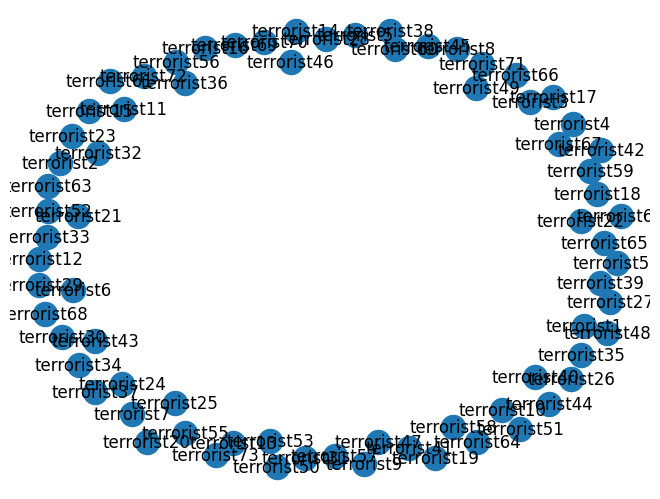

In [5]:
G = nx.Graph() # undirected graph
for i, node in enumerate(nodes_list): # w edges.txt numery ida od jedynki
    G.add_node(i+1, label=node)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

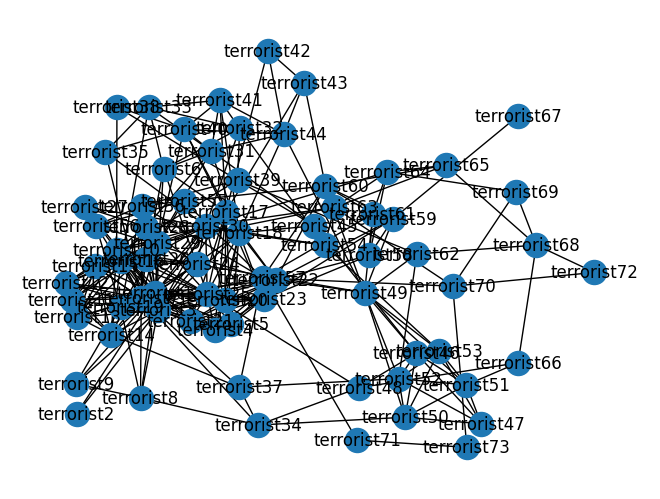

In [6]:
G.add_edges_from(edges)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

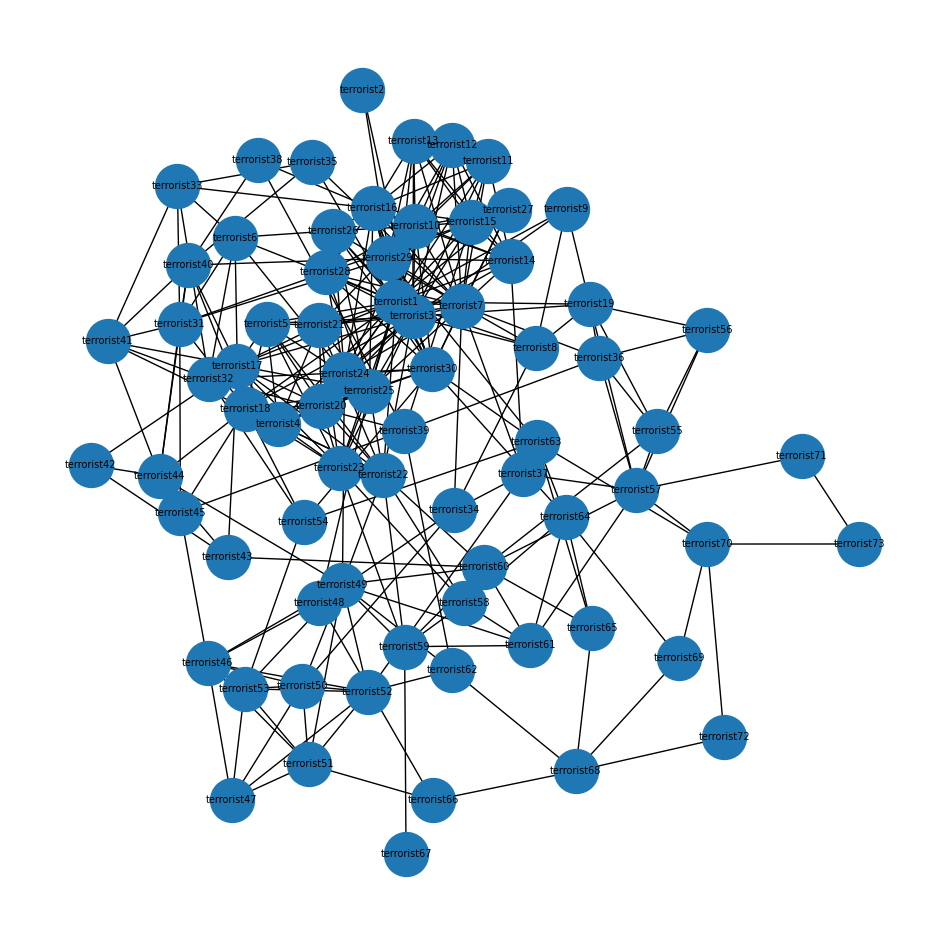

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
pos = nx.kamada_kawai_layout(G)
#pos = nx.layo
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'), ax=ax, pos = pos, node_size=1000, font_size=7)

In [8]:
G.remove_node(1)
G.remove_node(3)
G.remove_node(7)

In [9]:
G.nodes()

NodeView((2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73))

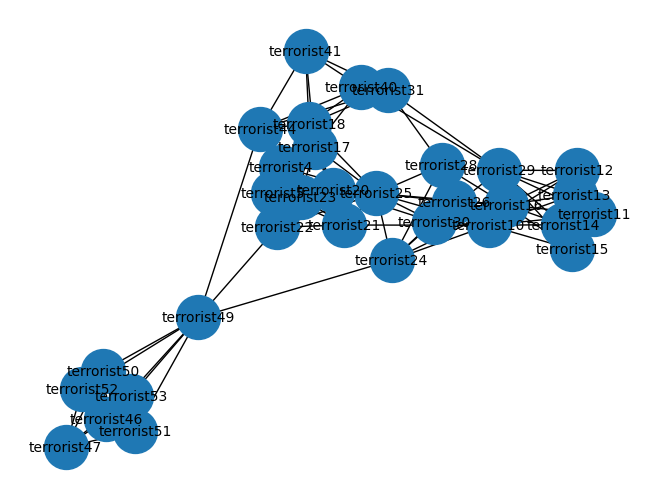

In [10]:
# analiza k-rdzeni
k_cores = nx.k_core(G, k=5)
nx.draw(k_cores, with_labels=True, labels=nx.get_node_attributes(k_cores, 'label'), node_size=1000, font_size=10)


In [11]:
# kliki
clicks = nx.find_cliques(G)
clicks = list(clicks)
#zeby nie bylo kilk z 2 elemntami
clicks = [sorted(click) for click in clicks if len(click) > 2]
clicks = [click for click in clicks if len(click) == max([len(click) for click in clicks])]
clicks
# plot clicks
print(f'Kliki terrorystów:')
for click in clicks:
    names = [G.nodes[node]['label'] for node in click]
    print(f'klika: {names}')

Kliki terrorystów:
klika: ['terrorist4', 'terrorist5', 'terrorist17', 'terrorist18', 'terrorist20', 'terrorist22', 'terrorist23', 'terrorist25']
klika: ['terrorist4', 'terrorist5', 'terrorist17', 'terrorist20', 'terrorist21', 'terrorist22', 'terrorist23', 'terrorist25']
klika: ['terrorist10', 'terrorist11', 'terrorist12', 'terrorist13', 'terrorist14', 'terrorist15', 'terrorist16', 'terrorist29']


In [12]:
# nx.degree(G) - zwraca liste tupli (node, degree)
def TERRORISTS(G: nx.Graph, n: int) -> list:
  degrees = nx.degree(G)
  # bierze kazzdy element z listy i sortuje po drugim elemencie i odwraca
  degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
  # degree[0] - index wierzcholka, degree[1] - stopien wierzcholka
  degrees = [(G.nodes[degree[0]]['label'],degree[1]) for degree in degrees]
  return degrees[:n] # [0:n] == [:n]
print(f"Terroryści z największą liczbą połączeń, szefowie gangów:")
TERRORISTS(G,5)

Terroryści z największą liczbą połączeń, szefowie gangów:


[('terrorist10', 15),
 ('terrorist25', 15),
 ('terrorist30', 14),
 ('terrorist16', 13),
 ('terrorist17', 13)]

In [13]:
nx.average_clustering(G)

0.41849848564134273

In [ ]:
nx.shortest_path(G, source=2, target=73)

In [15]:
degree = G.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 6.542857142857143


Text(0.5, 1.0, 'Stopień wierzchołka')

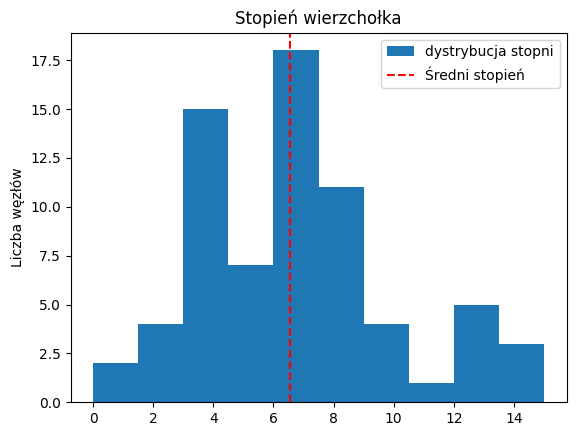

In [16]:
plt.hist(degree_list,label='dystrybucja stopni')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Średni stopień')
plt.legend()
plt.ylabel('Liczba węzłów')
plt.title('Stopień wierzchołka')

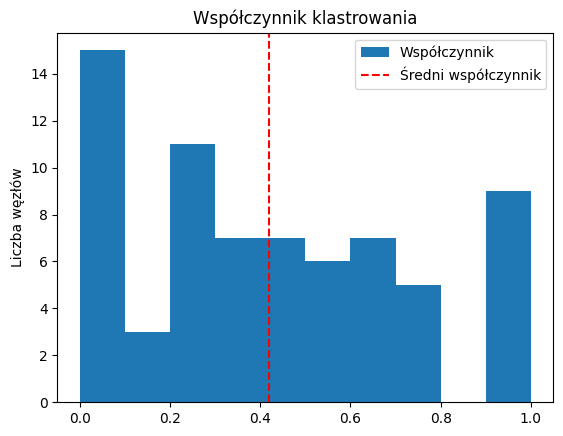

In [17]:

local_clustering_coefficient = nx.algorithms.cluster.clustering(G)


av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)


plt.hist(local_clustering_coefficient.values(),label='Współczynnik')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Średni współczynnik')
plt.legend()
plt.ylabel('Liczba węzłów')
plt.title('Współczynnik klastrowania')
plt.show()

In [18]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

In [19]:
nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected